In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

In [3]:
df_train = pd.read_csv('../../data/train/train.csv')
df_test = pd.read_csv('../../data/test/merged_test_data.csv')

df_test["overall"] = df_test["Overall"]
df_test = df_test.drop(columns=["Overall"])

In [4]:
print(df_train.columns)
print(df_test.columns)

Index(['Unnamed: 0', 'pair_id', 'id1', 'id2', 'text1', 'text2', 'overall'], dtype='object')
Index(['pair_id', 'id1', 'text1', 'id2', 'text2', 'overall'], dtype='object')


# Investigate the distribution of the number of words in a text
Class Text:
- get the text length from a dataframe
- calculate the average text length
- calculate the minimum and maximum text length

In [5]:
class Text:
    def __init__(self, df, df_type=""):
        self.df = df
        self.df_type = df_type

    def calc_text_len(self):
        """
            Calculates the length of the text in each row of the dataframe
        """
        self.text1_len = self.df['text1'].apply(len)
        self.text2_len = self.df['text2'].apply(len)

        text_len = self.text1_len.append(self.text2_len, ignore_index=True)

        return text_len
    
    def calc_avg_text_len(self):
        """
            Calculates the average length of the text in the dataframe
        """
        avg_text_len = self.calc_text_len().mean()

        return avg_text_len

    def calc_min_max_text_len(self):
        """
            Calculates the minimum and maximum length of the text in the dataframe
        """
        min_text_len = self.calc_text_len().min()
        max_text_len = self.calc_text_len().max()

        return min_text_len, max_text_len

    def plot_text_distribution(self, ax, color):
        """
            Plots the distribution of the text length in the dataframe
        """
        sns.histplot(self.calc_text_len(), ax=ax, color=color, kde=True)

    def __str__(self):
        return f"Average text length in {self.df_type} data: {self.calc_avg_text_len():.2f}\nMinimum text length in {self.df_type} data: {self.calc_min_max_text_len()[0]}\nMaximum text length in {self.df_type} data: {self.calc_min_max_text_len()[1]}"

train_text = Text(df_train, "train")
test_text = Text(df_test, "test")

print(train_text)
print("-"*50)
print(test_text)


Average text length in train data: 2406.95
Minimum text length in train data: 3
Maximum text length in train data: 99976
--------------------------------------------------
Average text length in test data: 1997.96
Minimum text length in test data: 51
Maximum text length in test data: 57902


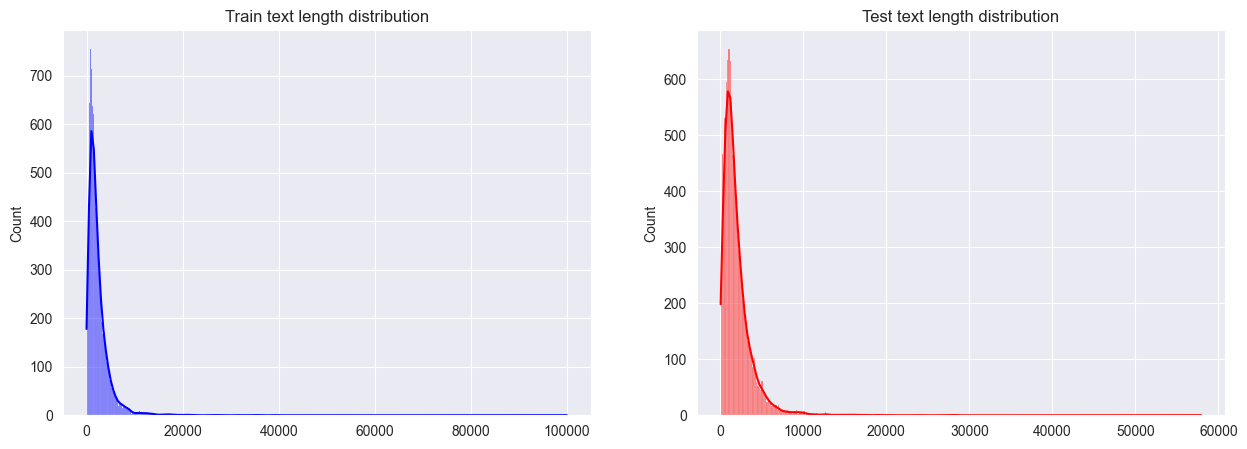

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

train_text.plot_text_distribution(ax[0], "blue")
test_text.plot_text_distribution(ax[1], "red")

ax[0].set_title("Train text length distribution")
ax[1].set_title("Test text length distribution")

plt.show()

# Investigate the overall similarity scores for the texts

In [7]:
class OverallScores:
    def __init__(self, df):
        self.df = df

    def plot_overall_scores(self, ax, color):
        """
            Plots the distribution of the overall scores in the dataframe
        """
        sns.histplot(self.df["overall"], ax=ax, color=color, kde=True, bins=15)

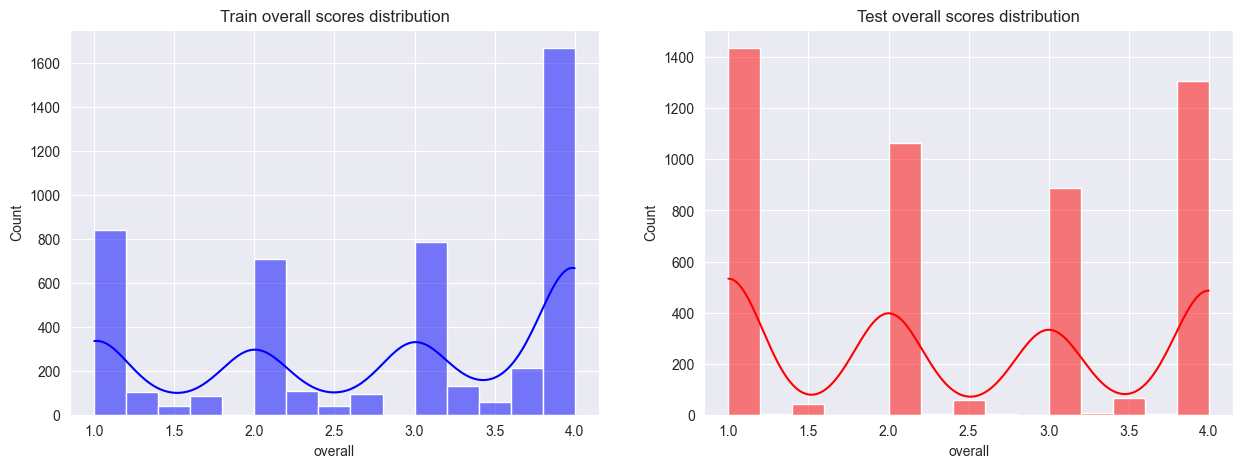

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
overall_scores_train = OverallScores(df_train)  
overall_scores_test = OverallScores(df_test)

overall_scores_train.plot_overall_scores(ax[0], "blue")
overall_scores_test.plot_overall_scores(ax[1], "red")

ax[0].set_title("Train overall scores distribution");
ax[1].set_title("Test overall scores distribution");